# Chapter 1: Machine Learning with Python

## 1. Linear & Non-linear Regressions

### A: Simple and multiple linear Regressions

Linear regression is a form of fitting continuous variables on each other. The main idea is that certain factors, or a combination of them, are related to additional factors through a given relation. These factors can be summarized and put into a function, defining the relation between the independent as well as dependent variables within a given sample. The easiest form of relation is a linear relation. If this condition is satisfied, we use an approach called "fitting", which defines that we fit the combination of dependent and independent variables for each observation and produces a linear slope. The slope is defined according to the principle that the sum of squared residuals (SSR) is minimised. The SSR is the average difference between each actual and predicted value of our dependent variable. 

Within a linear regression, on or a range of factors influence the variable of interest in a linear way. This indicates that the slope of the regression curve will be the same for each value combination within the slope. Although in statistical analysis many assumptions must be made regarding the validity of the model in terms of endogeneity concerns, prediction and predictive models in machine learning are less stringent to such requirements. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova

In [3]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

In [4]:
cars = pd.DataFrame(mtcars)

Let's start by describing and analysing our data:

In [6]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [12]:
cars_rel = cars[["mpg", "qsec","hp", "carb"]]

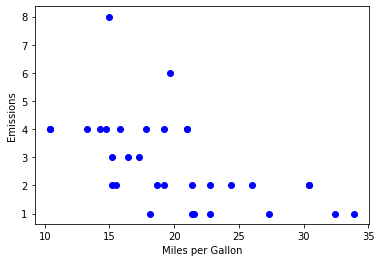

In [13]:
plt.scatter(cars_rel.mpg, cars_rel.carb, color = "blue")
plt.xlabel("Miles per Gallon")
plt.ylabel("Emissions")
plt.show()

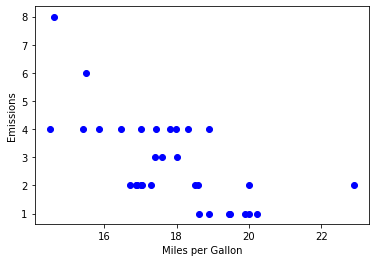

In [14]:
plt.scatter(cars_rel.qsec, cars_rel.carb, color = "blue")
plt.xlabel("Q per second")
plt.ylabel("Emissions")
plt.show()

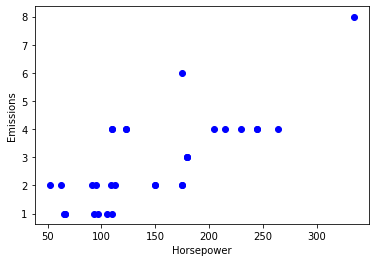

In [15]:
plt.scatter(cars_rel.hp, cars_rel.carb, color = "blue")
plt.xlabel("Horsepower")
plt.ylabel("Emissions")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

What does that mean, exactly? Well, that you simply take the training set, regress the relation with this set, retrieve a function and use this function in the testing set. Then, you compare the actual values of the testing set with its predicted values based on the function of the training set and retrieve a residual.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [126]:
msk = np.random.rand(len(cars_rel)) < 0.8
train = cars_rel[msk]
test = cars_rel[~msk]

Now, we can use the linear regression approach:

In [127]:
from sklearn import linear_model as lm 

lm = lm.LinearRegression()

train_x = np.asanyarray(train[["mpg", "qsec","hp"]])
train_y = np.asanyarray(train[["carb"]])
lm.fit(train_x, train_y)

print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficient: [[-0.01843217 -0.26292367  0.01156329]]
Intercept: [6.3095269]


#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. Formula: $MAE =\frac{1}{n} * \sum^n_{j=1} |y_j - \hat{y_j} | $ </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. Formula: $MSE =\frac{1}{n} * \sum^n_{j=1} (y_j - \hat{y_j})^2 $</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. Formula: $RMSE =\sqrt{\frac{1}{n} * \sum^n_{j=1} (y_j - \hat{y_j})^2} $</li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>



In [128]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["mpg", "qsec","hp"]])
test_y = np.asanyarray(test[["carb"]])
lm.fit(test_x, test_y)
test_y_hat = lm.predict(test_x) # This is the predicted values for the testing section


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


### B: Non-linear Regressions

#### Polynomial Regressions

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [51]:
from sklearn.preprocessing import PolynomialFeatures as pf 

train_x = np.asanyarray(train[["mpg", "qsec","hp"]])
train_y = np.asanyarray(train[["carb"]])

test_x = np.asanyarray(test[["mpg", "qsec","hp"]])
test_y = np.asanyarray(test[["carb"]])


poly = pf(degree=8)
train_x_poly = poly.fit_transform(train_x)
train_y_ = lm.fit(train_x_poly, train_y)

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$ for each x

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [52]:
test_x_poly = poly.fit_transform(test_x)
test_y_hat = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

Mean absolute error: 78.14
Residual sum of squares (MSE): 14960.44
R2-score: -0.58


#### Logistic Regressions:

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [54]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
china = pd.read_csv("china_gdp.csv")

2020-08-07 11:24:07 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


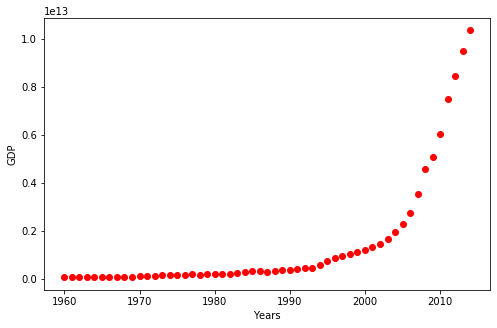

In [58]:
plt.figure(figsize = (8,5))
x_value, y_value = (china["Year"].values, china["Value"].values)
plt.xlabel("Years")
plt.ylabel("GDP")
plt.plot(x_value, y_value, "ro")
plt.show()

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated.

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [59]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

Let's look at a sample:

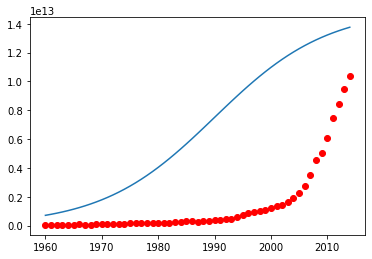

In [74]:
Beta_1 = 0.10
Beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_value, Beta_1 , Beta_2)

#plot initial prediction against datapoints
plt.plot(x_value, Y_pred*15000000000000.)
plt.plot(x_value, y_value, 'ro')

In [76]:
# Lets normalize our data
xdata =x_value/max(x_value)
ydata =y_value/max(y_value)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(x_value, *popt) - y_value is minimized.

This means that the function looks for the values of Beta 1 and Beta 2 that deliver the y_hat values which will have the smallest SSR. 

popt are our optimized parameters.

In [77]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


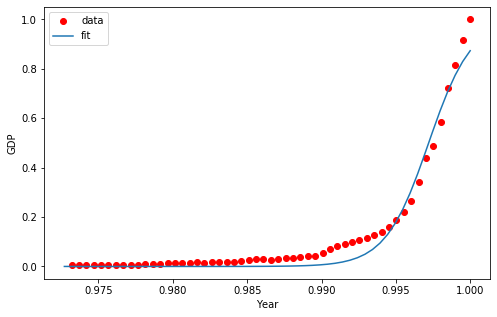

In [81]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, "ro", label = "data")
plt.plot(x, y, label = "fit")
plt.legend(loc = "best")
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


## 2. Classification

Classification is a form of supervised learning. It basically classifies individuals into a certain group depending on their pre-determined characteristics. Classification can be used for both binary and multilineary analysis to assign individuals a certain status. 

The most common tools for classification are:

1. k-nearest neighbors
2. Decision Trees
3. Logistic Regression
4. Support Vector Machines (SVM)
5. Neural Networks
6. Naive Bayes
7. Linear Discrimination Analysis (LDA)

### A: K-nearest neighbors

The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. This algorithm classifies cases based on their similarity to other cases. In K-Nearest Neighbors, data points that are near each other are said to be neighbors. K-Nearest Neighbors is based on this paradigm. Similar cases with the same class labels are near each other. Thus, the distance between two cases is a measure of their dissimilarity. There are different ways to calculate the similarity or conversely, the distance or dissimilarity of two data points. 

In a classification problem, the K-Nearest Neighbors algorithm works as follows:

1. Pick a value for K
2. Calculate the distance from the new case hold out from each of the cases in the dataset
3. Search for the K-observations in the training data that are nearest to the measurements of the unknown data point
4. Predict the response of the unknown data point using the most popular response value from the K-Nearest Neighbors

There are two parts in this algorithm that might be a bit confusing: 

1. How to select the correct K
2. How to compute the similarity between cases

To one: The general solution is to reserve a part of your data for testing the accuracy of the model. Once you've done so, choose K equals one and then use the training part for modeling and calculate the accuracy of prediction using all samples in your test set. Repeat this process increasing the K and see which K is best for your model.

To two: We can use the Minowski distance matrix for multidimensional vectors. Of course, we have to normalize our feature set to get the accurate dissimilarity measure.

In [82]:
import itertools
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [83]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-08-07 12:42:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   118KB/s    in 0.3s    

2020-08-07 12:42:26 (118 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [92]:
telco = pd.read_csv("teleCust1000t.csv")

In [93]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [95]:
x = telco[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values.astype(float)
y = telco['custcat'].values

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [98]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

#### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


We can now introduce the KNN method. As we said, the best way to figure out which k to use is by defining the same method for different ks and then deciding through an evaluation technique, which the optimal k is to use that maximizes the accuracy / minimizes the errors. Commonly, we have three types of evaluation strategies: 


- Jaccard Index
- F1 values
- Log Loss 

**1. Jaccard index**

Let’s say y shows the true labels of the churn dataset. And $\hat{y}$ shows the predicted values by our classifier. Then we can define Jaccard as the size of the intersection divided by the size of the union of two label sets. 

This is given by the formula: $\frac{|y \cap \hat{y}|}{|y| + |\hat{y}| - |y \cap \hat{y}| }$

For example, for a test set of size 10, with 8 correct predictions, or 8 intersections, the accuracy by the Jaccard index would be: 8 / (10+10-8) = 0.66. 

If the **entire set** of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0, otherwise it is 0.0. 

This means, **The closer the value to 1, the better**

#### As we said earlier, we want to choose k such that we can maximise or minimise one of these scores. 

In our case, we use a function (accuracy_score) that is equal to the jaccard_similarity_score function.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [115]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
    

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

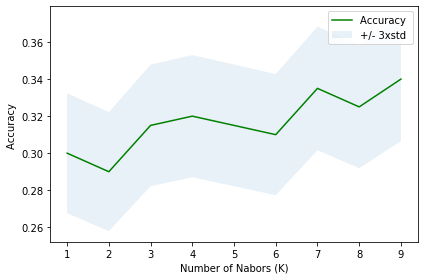

In [116]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [121]:
print("The most accurate neighbor count that maximizes the Jaccard score is:", mean_acc.argmax()+1, "with a Jaccard score of:", mean_acc.max())

The most accurate neighbor count that maximizes the Jaccard score is: 9 with a Jaccard score of: 0.34


**2. F1-score**

The F1 Score is used to access a confusion matrix in which the correctly as well as incorrectly specified values of the test data are indicated. In our case, we either give the customer a churn value of 0 or 1. Then, we compare theses values with the predicted values of our model to see how accurately it depicted the churns of our customers. 

A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In the specific case of a binary classifier, we can interpret these numbers as the count of:

1. true positives
2. false negatives
3. true negatives
4. false positives

Based on the count of each section, we can calculate the precision and recall of each label. 

**Precision** is a measure of **the accuracy, provided that a class label has been predicted**. It is defined by: 

$Precision = \frac{True Positive}{True Positive + False Positive}$

**Recall** is the **true positive rate**. It is defined as: 

$Recall = \frac{True Positive}{True Positive + False Negative}$

The **F1 score is the harmonic average of the precision and recall**, where an F1 score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0. It is defined using the F1-score equation. 

$F1 = 2* \frac{Precision * Recall}{Precision + Recall}$

For example, the F1-score for class 0 (i.e. churn=0), is 0.83, and the F1-score for class 1 (i.e. churn=1), is 0.55. And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case. Please notice that both Jaccard and F1-score can be used for multi-class classifiers as well. 

To get a clearer understanding, let's look at the following example. In this case, our model predicted: 

- the true label of y correctly in 6 of 15 cases for a churn value of 1 
- the true label of y correctly inn 24 of 25 cases for a churn value of 0 

This means that we get two Recall values: 

- Recall 1 = 6/15 = 0.40
- Recall 2 = 24/25 = 0.96

Also, our model predicted: 

- 6 out of 7 times the correct churn value for a churn value of 1
- 24 out of 33 times the correct churn value for a churn value of 0 

This means we get two Precision values: 

- Precision 1: 6/7 = 0.86
- Precision 0: 24/33 = 0.73

Overall, we receive two F1 scores: 

- F1 1: 2 * (0.4 * 0.86)/(0.4+0.86) = 0.55
- F1 0: 2 * (0.73 * 0.96)/(0.73+0.969 = 0.83

And a harmonic value of F1: 

- F1 = (0.83 + 0.55)/2 = 0.69

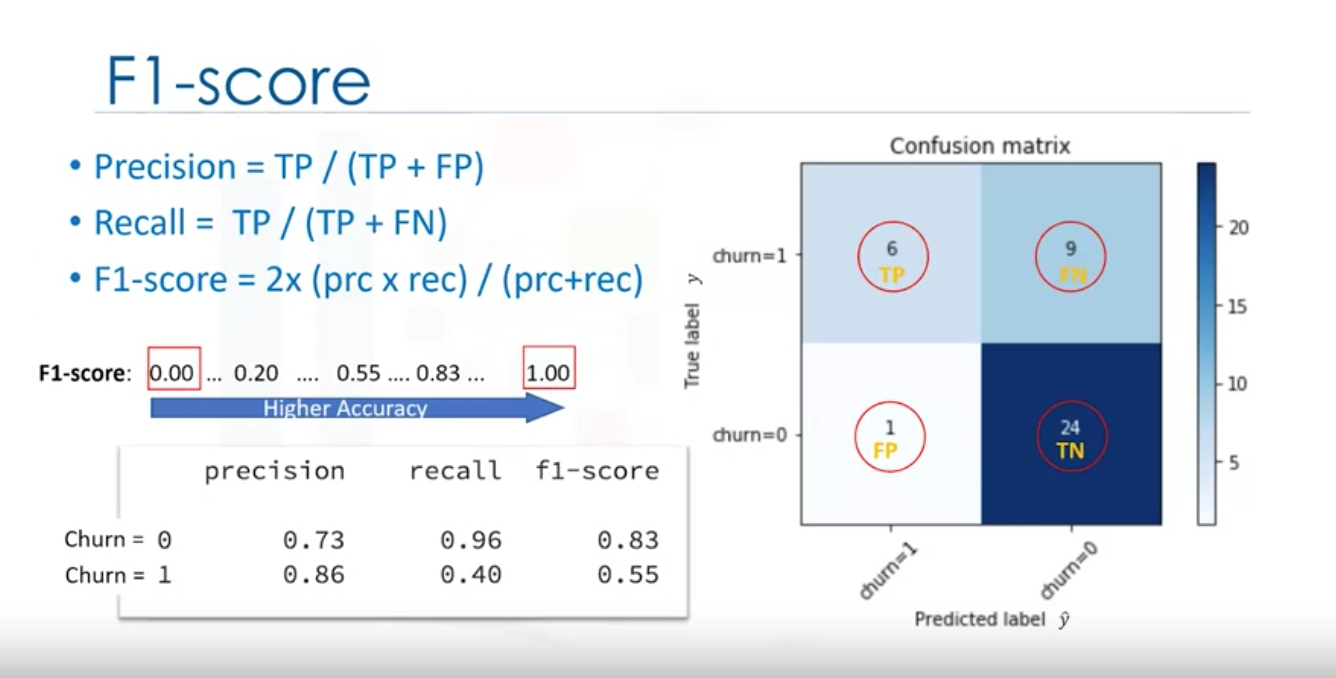

In [107]:
from IPython.display import Image
Image(filename='/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/Matrix.png')

**3. Log Loss**

Sometimes, the output of a classifier is the probability of a class label, instead of the label. For example, in logistic regression, the output can be the probability of customer churn, i.e., yes (or equals to 1). 

This probability is a **value between 0 and 1**. Logarithmic loss (also known as Log loss) measures the performance of a classifier where the **predicted output is a probability value between 0 and 1**.

We can calculate the log loss for each row using the log loss equation, which measures how far each prediction is, from the actual label. 
$Log_{Loss} = y * log(\hat{y}) + (1-y)*log(1-\hat{y})$

Then, we calculate the average log loss across all rows of the test set.

### B: Decision Trees

Decision trees are built using **recursive partitioning** to classify the data. 

Let's say we have 14 patients in our data set, the algorithm chooses the most predictive feature to split the data on. In our data we have four attributes: 

- sex 
- cholesterol level 
- BP
- Age 

What is important in making a decision tree, is to determine which attribute is the best or **most predictive** to split data based on the feature. This is called **predictiveness testing**. We use this testing to see which attribute can best divide the data into the categorization we require, such as the eligibility for a certain drug. If we can say with a high certainty that individuals with a certain attribute require a specific drug, **we imply that this attribute is predictive of the drug requirement**. 

Indeed, predictiveness is based on **decrease in impurity of nodes**. 

We're looking for the best feature to decrease the impurity of patients in the leaves, after splitting them up based on that feature. A node in the tree is considered pure if, in 100 percent of the cases, the nodes fall into a specific category of the target field. In fact, the method uses recursive partitioning to split the training records into segments by minimizing the impurity at each step. 

Impurity of nodes is calculated by **entropy of data in the node**. Entropy is the **amount of randomness in the data**. The entropy in the node depends on how much random data is in that node and is calculated for each node. In decision trees, we're looking for trees that have the **smallest entropy in their nodes**. The entropy is used to calculate the homogeneity of the samples in that node. If the samples are completely homogeneous, the entropy is zero and if the samples are equally divided it has an entropy of one. You can easily calculate the entropy of a node using the frequency table of the attribute through the entropy formula where P is for the proportion or ratio of a category, such as drug A or B: 

- Entropy = - p(A) * log(p(A)) - p(B) * log(p(B))

In general we say: **The less entropy a node has, the less uniform the distribution of the assignment, the purer the node**

This bears the question how we can use the entropies of different nodes to make a decision about which attributes to split our data into. The general solution is that we calculate **information gain**, which is the opposite of entropy. As **entropy decreases, our information gain increases**. The information gained is the entropy of the tree before the split minus the weighted entropy after the split. 

- Information Gain = Entropy before Split - [p(A) * Entropy Split A + p(B) * Entropy Split B]

In the end, we take the node which delivers us the highest information gain and then repeat this process for each node until we find the best decision distribution that delivers us the purest nodes. 

In general, decison trees require the following steps: 

1. Calculate the Entropy before the first split (as the assignment of the drug to each patient) 
2. Calculate the Entropy after the split for each split side of each attribute 
    - (e.g. sex: divide into male & female and then take for both genders the distribution)
3. Calculate the information gain for all attributes of the first node 
4. Choose the node with the biggest information gain
5. Calculate for each split of the respective node the subsequent entropies based on the distribution of drug assignments according to the characteristic
6. Repeat the process 

Calculating the entropy before splitting, we see that we have 5 patients assigned the drug A and 9 assigned the drug B. Therefore, our entropy is: 

- Entropy before Splitting = -5/14 * log(5/14) - 9/14 * log(9/14) = 0.940 

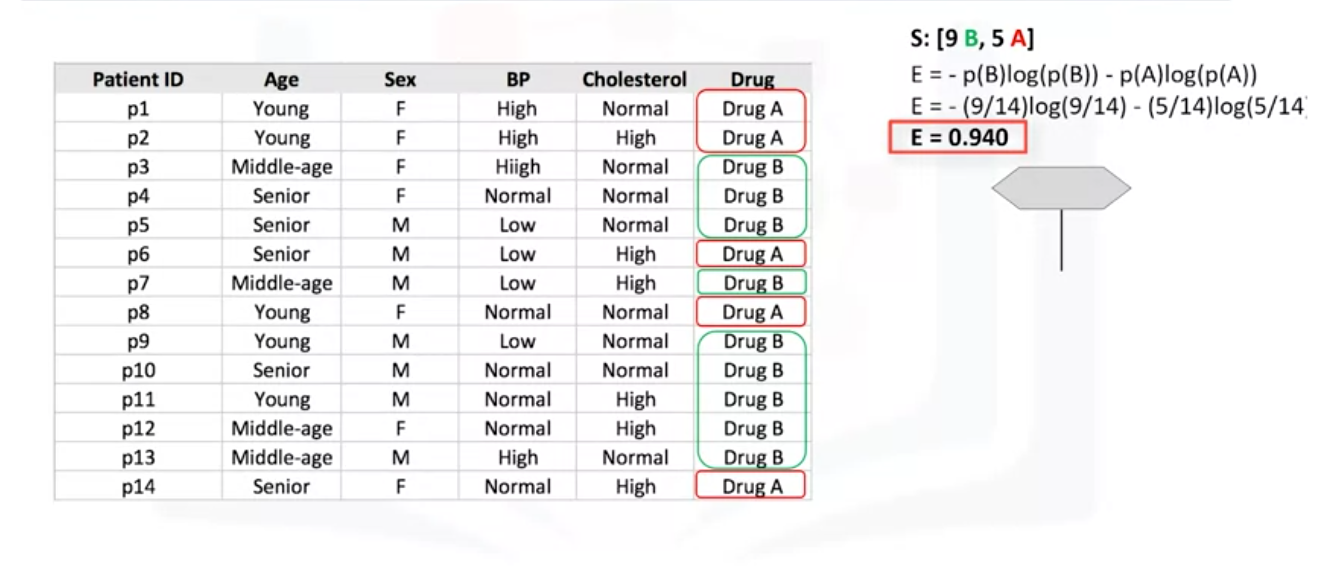

In [130]:
Image(filename='/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/Entropy_before_splitting.png')

Now, let's say we choose between sex and cholesterol levels to find the subsequent node. We can use the entropies after splitting for sex (male and female) as well as cholesterol (normal and high): 

- Entropy after splitting sex male = -6/7 * log(6/7) - 1/7 * log(1/7) = 0.592
- Entropy after splitting sex female = - 3/7 * log(3/7) - 4/7 * log(4/7) = 0.895

- Entropy after splitting cholesterol normal = -6/8 * log(6/8) - 2/8 * log(2/8) = 0.811
- Entropy after splitting cholesterol high = - 3/6 * log(3/6) - 3/6 * log(3/6) = 1.000

As a consequence, we receive two distinct information gains: 

- Information gain sex = 0.940 - (0.592 * 7/14 + 0.895 * 7/14) = 0.151
- Information gain cholesterol = 0.940 - (0.811 * 8/14 + 1.00 * 6/14) = 0.048

Therefore, we will use sex as first attribute. 

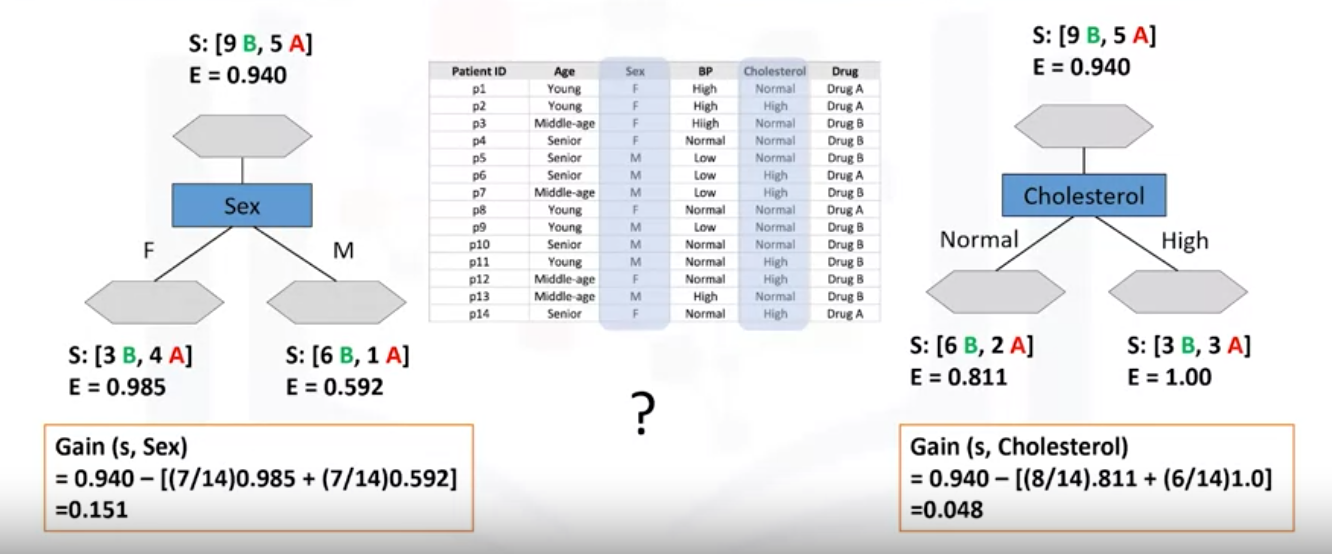

In [132]:
Image(filename='/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/Information_gains.png')

We can now go to the next node, but this time we start with the sex distribution as entropy before splitting. If we now say we can choose between cholesterol and BP, we get 6 distinct entropies (as BP has 3 different distributions)

- Entropy after splitting cholesterol normal female = - 2/4 * log(2/4) - 2/4 * log(2/4) = 1.00
- Entropy after splitting cholesterol high female = - 2/3 * log(2/3) - 1/3 * log(1/3) = 

- Entropy after splitting cholesterol normal male = - 4/4 * log(4/4) = 0.00 
- Entropy after splitting cholesterol high male = - 2/3 * log(2/3) - 1/3 * log(1/3) = 

- Entropy after splitting BP low female = 0.00
- Entropy after splitting BP normal female = 1.00
- Entropy after splitting BP high female = - 2/3 * log(2/3) - 1/3 * log(1/3) = 

- Entropy after splitting BP low male = -3/4 * log(3/4) - 1/4 * log(1/4) =
- Entropy after splitting BP normal male = 0.00
- Entropy after splitting BP high male = 0.00

From this point on, we can again calculate the Informaion gain as weighted average for both our attributes for each sex and then define, for each gender, which attribute the next node should incorporate. 

Let us now look at a real world example with the drugs dataset described earlier: 

In [133]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-08-19 12:43:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-08-19 12:43:04 (180 MB/s) - ‘drug200.csv’ saved [6027/6027]



#### First, we analyze the dataset and clean it such that it only consists of numerical values

In [209]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [210]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [211]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [212]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### Next, we can model the tree with the drugTree command

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [215]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [220]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### We can now predict the tree

In [217]:
predTree = drugTree.predict(X_testset)

#### And evaluate the precision of the model:

In [218]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


#### Lastly, we can visualize the path according to the pre-defined entropy minimisation

In [183]:
# You first have to istall these two packages before being able to visualize the tree: 
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -yv

Solving environment: done

## Package Plan ##

  environment location: /Users/nikolas.anic/opt/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.0 MB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.8.4-py37hc8dfbb8_2



pydotplus-2.0.2      | 22 KB     | ##################################### | 100% 
conda-4.8.4          | 3.0 MB    | ##################################### | 100% 
Preparing transacti

In [206]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

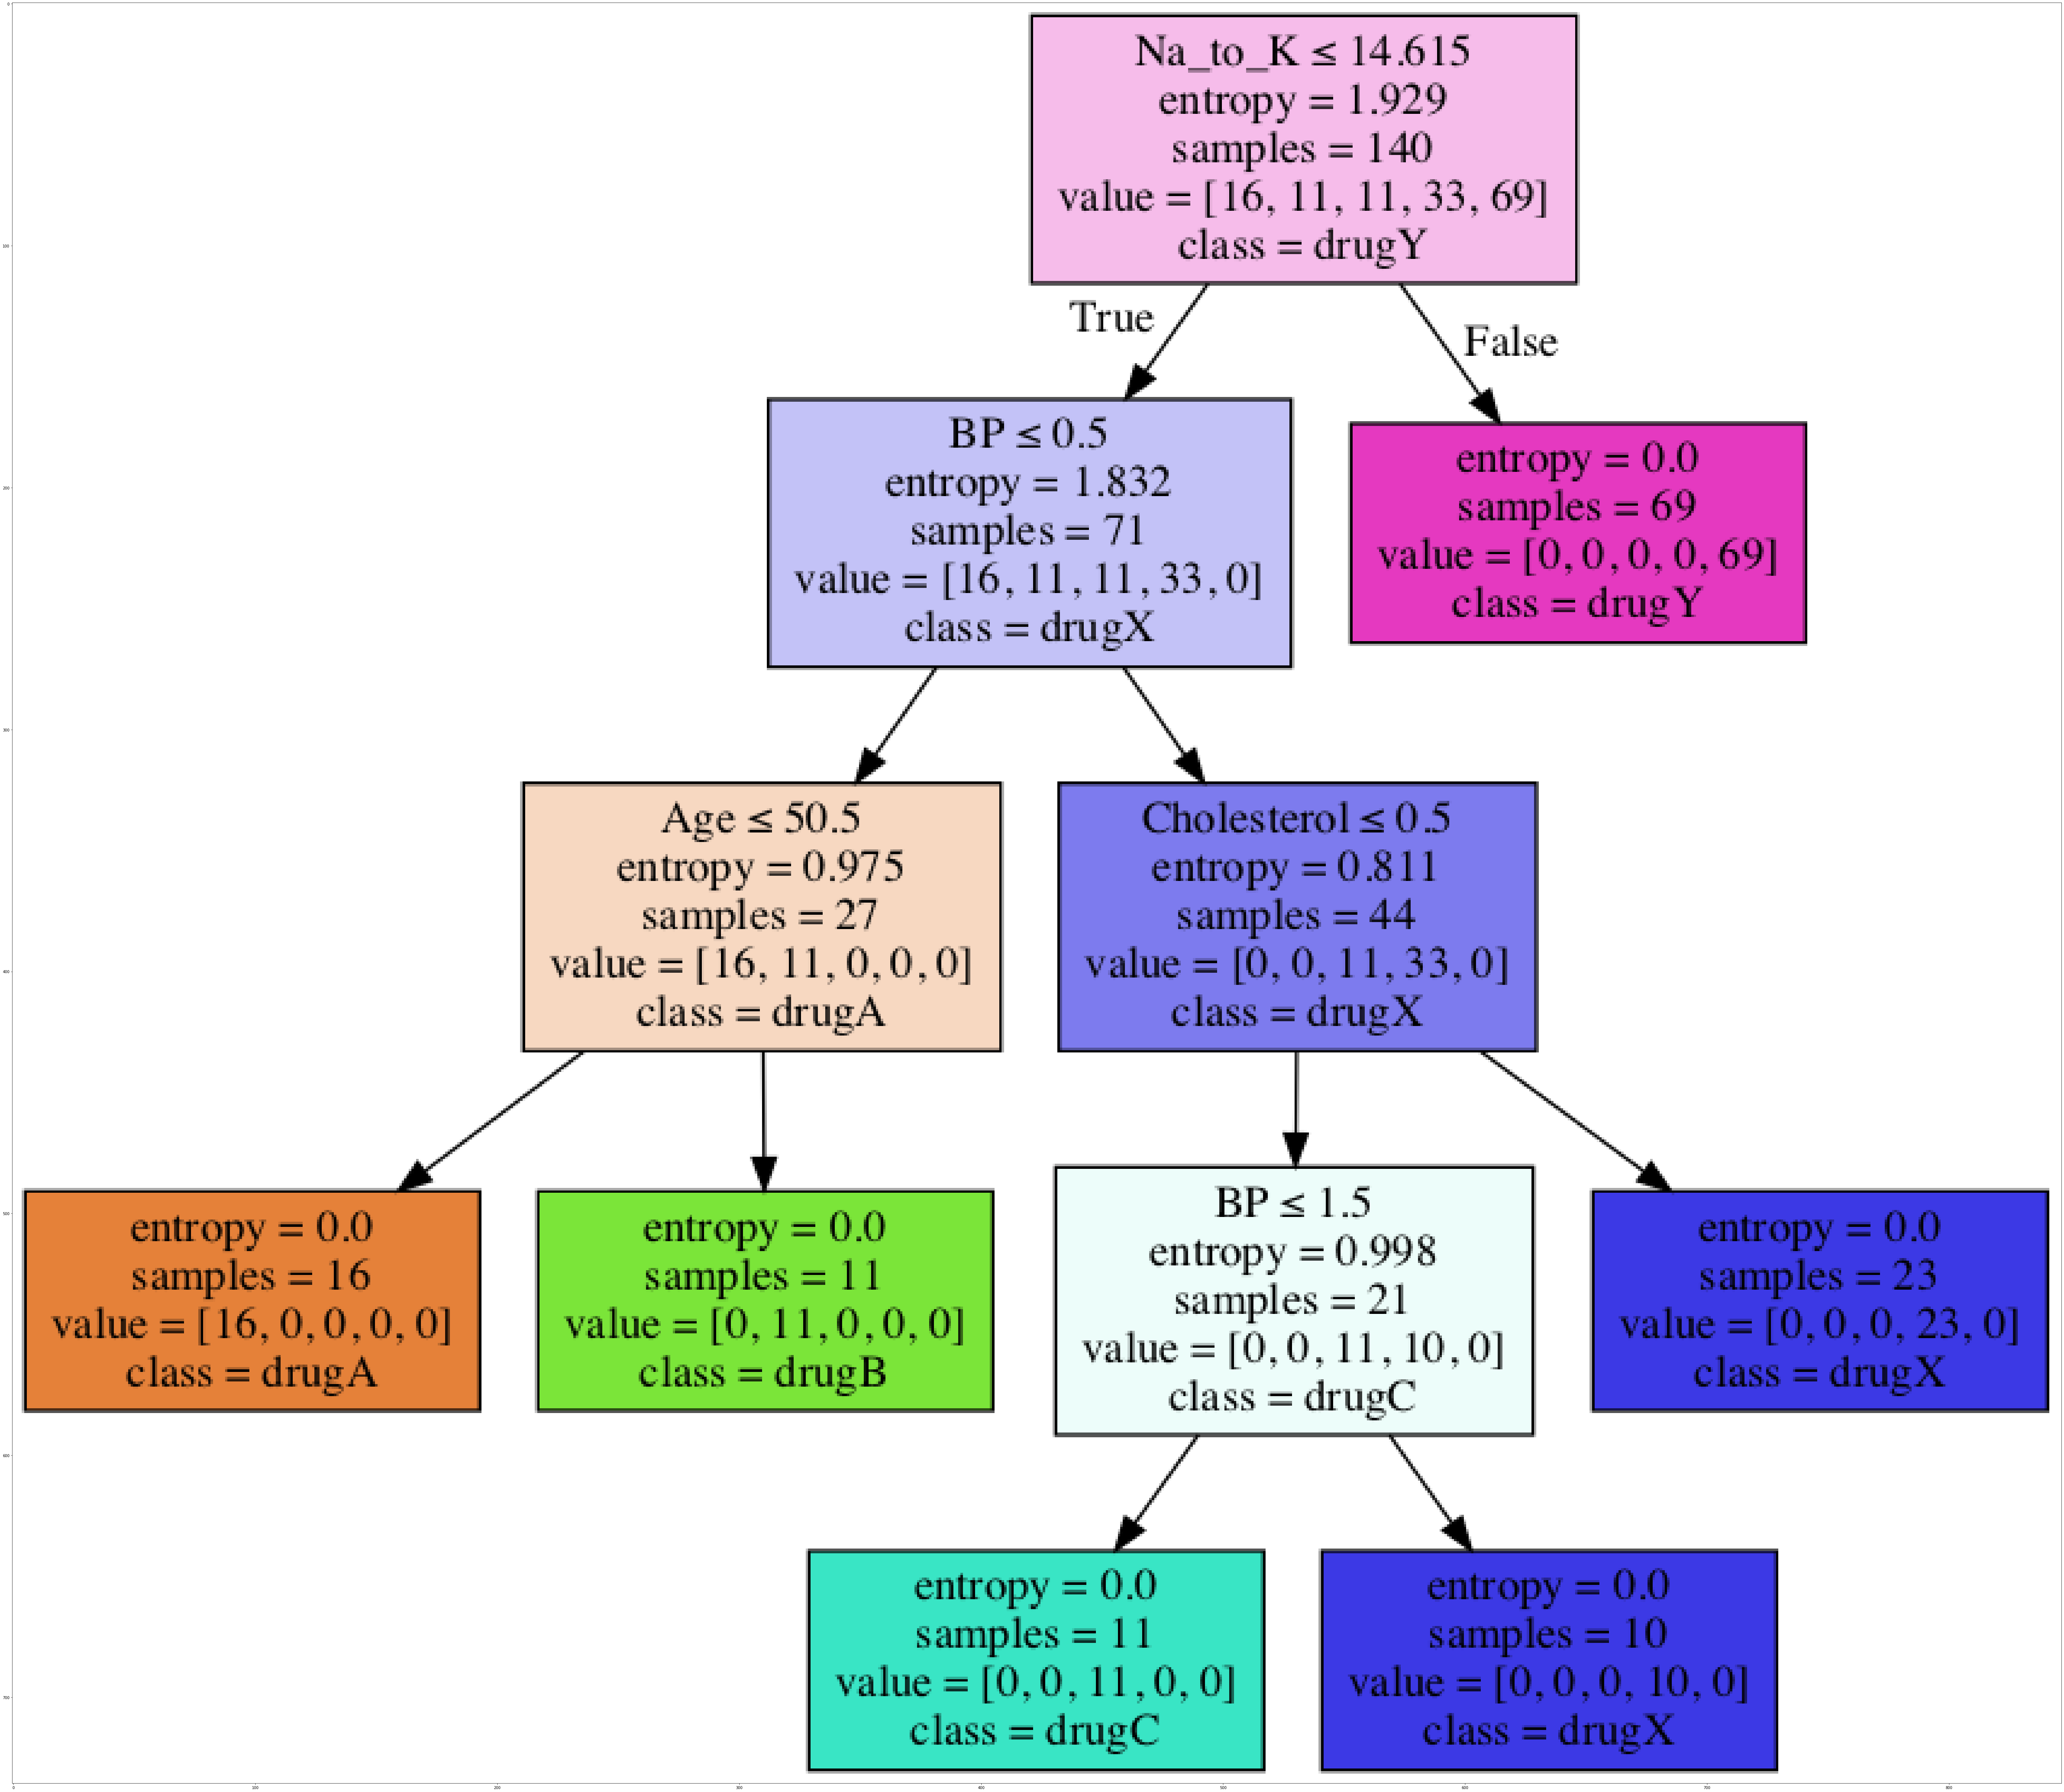

In [219]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### C: Logistics Regression

The goal of logistic regression is to build a model to predict the class of each customer and also **the probability of each sample belonging to a class**. Ideally, we want to build a model, $\hat{y}$, that can estimate that the class of a customer is one given its feature is x.

In logistic regression, we use one or more independent variables such as tenure, age, and income to predict an outcome, such as churn, which we call the dependent variable representing whether or not customers will stop using the service. Logistic regression is analogous to linear regression but tries to predict a categorical or discrete target field instead of a numeric one.

In logistic regression independent variables should be continuous. If categorical, they should be dummy or indicator coded. This means we have to transform them to some continuous value.

#### When to use the logistic regression:

There are several cases in which logistic regression serves as a valuable tool: 

1. when the target field in your data is categorical or specifically is binary. 

2. You need the probability of your prediction. 

3. Third, if your data is linearly separable. The decision boundary of logistic regression is a line or a plane or a hyper plane. A classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class. 

4. You need to understand the impact of a feature. You can select the best features based on the statistical significance of the logistic regression model coefficients or parameters. That is, after finding the optimum parameters, a feature X with the weight Theta one close to zero has a smaller effect on the prediction than features with large absolute values of Theta one. Indeed, it allows us to understand the impact an independent variable has on the dependent variable while controlling other independent variables.

The goal of logistic regression is to build a model to predict the class of each sample. Linear regression or linear probaility is not very suitable in such cases as both methods cannot clearly assign either a group contribution or a continuous threshold for the individuals. Instead of using step functions, we can convert the values into a logistic system through a **sigmoid function**. 

#### The sigmoid function:

The sigmoid function translates the values of our dependent variable into a logistic system, which can then be interpreted as probabilities, with values between 0 and 1. Specifically, it indicates the probability of an individual being in a certain group conditional on its (continuous) independent variables. As a formula: 

Sigmoid = $\frac{1}{1+e^{-\theta^T X}}$

In many settings, we have a default outcome, such as the probability that Y is 1 given x: 

$P(Y=1|X)$

The bigger the Theta - X becomes, the smaller the denominator becomes, and, consequently, the further the Sigmoid function goes to 1, vice versa. Now, we use the Sigmoid to define the probability that Y is 1 given the Theta - X combinations. 

We can calculate all Sigmoid probabilities within our training dataset and then define which person belongs to which group to what probability. 

#### The cost function:

Next, we must define our training parameters to reach a good model for prediction. We do so by attempting to minimise the cost function, which is the squared sum of all error terms. This is an iterative process which is repeated until the parameters are set such that the cost is lowest. 

Again, we divide the data into training and testing phases. We then calculate the model in the training phase. Next, we apply the model to the test parameters by using the predict method. Lastly, we calculate the difference between actual test values of y and the predicted, model-based values of y and define our cost function. 

The cost function in ML settings is defined as the Mean Squared Error (MSE) (sometimes also RMSE):

$Cost(\hat{y}, y) = \frac{1}{2} * (Sigmoid - y)^2$

$J(\theta) = \frac{1}{m} * \sum^m_{i-1}Cost(\hat{y}, y)$


#### Minimising the cost function:

##### Transforming the cost function into logs for minima detection


Then, we need to minimise this function. However, finding the global minimum of derivatives is rather complex. 

An easier way to obtain the desired result is to use a function which returns low costs when the predicted values fits the actual value very well and high costs in the oppisite case. In the case that we want a value of 1 for our y (which assigns the probability that we are in the default group), we need a function which returns a low cost if the predicted value is close to 1 and a higher cost if it is further away from this probability. Therefore, the **minus log function** is suitable to portray the costs if the desired outcome is one and the **1 minus log function** is suitable if the desired outcome is 0. As a consequence, we can replace the cost function with the log function: 

- $-log(\hat{y}$ for y = 1

- $-log(1 - \hat{y})$ for y = 0

If we plug both into our previous cost function, we retrieve the log-transformed cost-function, which can easily be defined through a derivative: 

- $J(\theta) = -\frac{1}{m} * \sum^m_{i-1} y^{i}log(\hat{y}^{i}) + (1-y^{i})log(1-\hat{y}^{i})$

##### Gradient Descent to minimise the cost function: 

Gradient descent is an iterative approach to finding the minimum of a function. Specifically in our case gradient descent is a technique to **use the derivative of a cost function to change the parameter values to minimize the cost or error**.

The basic idea of a gradient descent is that it gradually descends its parameters to get towards the cost minimisation. Thus, we choose a set of weights for the parameters and then, via derivatives, iterate until the gradient minimises the cost function. If we use a two-dimensional space, such as age and income, we can define our cost function through the sigmoid function, based on the theta values for the variables age and income. Consequently, we can add a third dimension, defined by the error, or cost, of the model. If we now plot the function and calculate the errors for different theta combinations of age and income, we get a decreasing spider web. 

This is called your error curve or error bowl of your cost function. Recall that we want to use this error bowl to find the best parameter values that result in minimizing the cost value. We do so by minimising the position on the error curve. This means you have to find the minimum value of the cost by changing the parameters.

You can find these parameters by first randomly choosing two values and then taking steps down the curve through an interative appproach. 

To find the direction and size of these steps, in other words to find how to update the parameters, you should calculate the **gradient of the cost function at that point**. The gradient is the slope of the surface at every point and the direction of the gradient is the direction of the greatest uphill. 

We calculate the gradient of a cust function at each point by taking the partial derivative of J of theta with respect to each parameter at that point. This gives you the slope of the move for each parameter at that point. Now, if we move in the opposite direction of that slope, it guarantees that we go down in the error curve. Gradient descent takes increasingly smaller steps towards the minimum with each iteration. 

The partial derivative of the cost function J is calculated using this expression: 

$\frac{\delta J}{\delta \theta_1} = - \frac{1}{m} \sum^m_{i=1}(y^{i} - \hat{y}^{i})*x^{i}_1$

So, this equation returns the slope of that point and we should update the parameter in the opposite direction of the slope. A vector of all these slopes is the **gradient vector**, and we can use this vector to **change or update all the parameters**. We take the **previous values of the parameters and subtract the error derivative**. This results in the new parameters for theta that we know will decrease the cost. Also we **multiply the gradient value by a constant value mu**, which is called the **learning rate**. Learning rate, gives us additional control on how fast we move on the surface: 

$New \theta = Old \theta - \mu * \triangle J$

Notice that it's an iterative operation and in each iteration we update the parameters and minimize the cost until the algorithm converge is on an acceptable minimum.


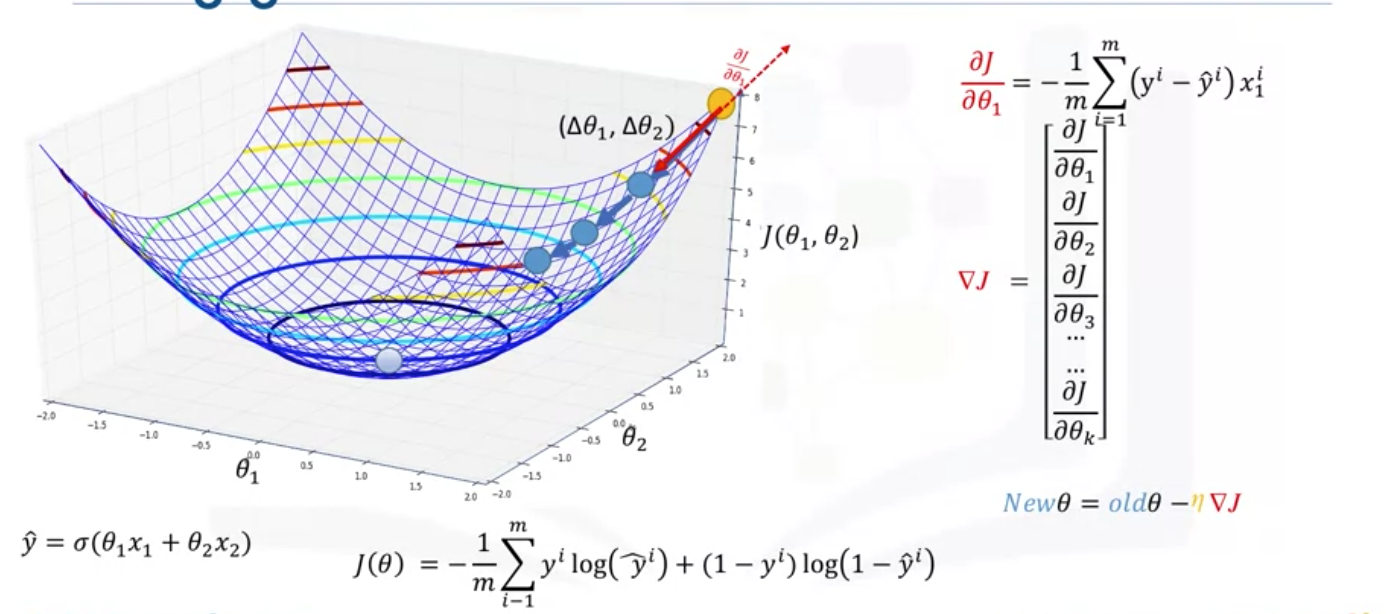

In [222]:
Image(filename = "/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/Gradient_descent.png")

Generally, we follow these five steps to find the optimal minimum of our cost function: 

1. Define independent variables for the sigmoid function which can model the probability of being in a group 
2. Calculate the sigmoid function values through random parameter values 
3. Feed the cost function with the training set and calculate the cost (or errors) 
4. Calculate the gradient vector of the cost function as the partial derivative of each parameter combination
5. Update the weights of the parameters with the new values through the learning rate and gradient vector
6. Repeat steps 2 to 5 until the cost function is sufficiently low 

#### Let's look at a real-world example: 

In [235]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/ChurnData.csv

--2020-08-21 13:11:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K   138KB/s    in 0.3s    

2020-08-21 13:11:59 (138 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [238]:
churn = pd.read_csv("ChurnData.csv")

In [239]:
churn_df = churn[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

/Users/nikolas.anic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [240]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
Y = np.asarray(churn_df["churn"])

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

#### Modelling logistic regressions with scikit learn: 

Lets build our model using **LogisticRegression** from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it on the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. 

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
y_hat = LR.predict(X_test)

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [244]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.85690857, 0.14309143],
       [0.8697156 , 0.1302844 ],
       [0.76166698, 0.23833302],
       [0.90407428, 0.09592572],
       [0.73013344, 0.26986656],
       [0.51687948, 0.48312052],
       [0.62528805, 0.37471195],
       [0.87343004, 0.12656996],
       [0.41738015, 0.58261985],
       [0.90879227, 0.09120773],
       [0.91197228, 0.08802772],
       [0.94638922, 0.05361078],
       [0.46056268, 0.53943732],
       [0.50728319, 0.49271681],
       [0.85969108, 0.14030892],
       [0.83853006, 0.16146994],
       [0.69422555, 0.30577445],
       [0.83555304, 0.16444696],
       [0.76818077, 0.23181923],
       [0.63304223, 0.36695777],
       [0.86342114, 0.13657886],
       [0.6537177 , 0.3462823 ],
       [0.93254727, 0.06745273],
       [0.5620099 , 0.4379901 ],
       [0.796927  , 0.203073  ],
       [0.95143725, 0.04856275],
       [0.77561377, 0.22438623],
       [0.80906014, 0.19093986],
       [0.59530665, 0.40469335],
       [0.96431506, 0.03568494],
       [0.

#### Evaluation

As with the method of k-means, we can use either the Jaccard Index, the Confusion Matrix or, most probably, the Log-Loss function: 

In [246]:
# Jaccard Index 

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y_test, y_hat)

/Users/nikolas.anic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.675

In [289]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, y_hat, labels=[1,0]))

[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


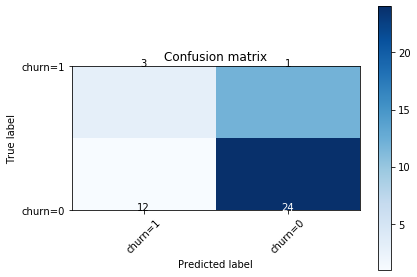

In [290]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [251]:
print (classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



In [277]:
# Log Loss

from sklearn.metrics import log_loss

log_loss(Y_test, yhat_prob)

0.5633358354744319

In [280]:
# Use the Log Loss with different solvers: 

LR2 = LogisticRegression(C = 0.01, solver = "sag").fit(X_train, Y_train)
Y_hat_2 = LR2.predict_proba(X_test)
log_loss(Y_test, Y_hat_2)

/Users/nikolas.anic/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.6203420090358656

### D: Support Vector Machines

A Support Vector Machine is a supervised algorithm that can classify cases by finding a separator. 

SVM works by first mapping data to a high dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. Then, a separator is estimated for the data. The data should be transformed in such a way that a separator could be drawn as a hyperplane. Therefore, the SVM algorithm outputs an optimal hyperplane that categorizes new examples. 

In general, this means that we non-linearily separate the data (based on its multidimensional characteristics) according to the categorization or assignment of treatment. This will then give us a non-linear combination of characteristics for each assignment, which can be separated by a line (2D), hyperplane (3D). 
 
Now, there are two challenging questions to consider: 

1. How do we transfer data in such a way that a separator could be drawn as a hyperplane? 

To satisffy the first concern, we can use a process called **Kernelling**. It basically means mapping data into a higher-dimensional space, such that we can use a hyperplane to divide the data in categories. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as linear, polynomial, Radial Basis Function,or RBF, and sigmoid.

2. How can we find the best or optimized hyperplane separator after transformation?

Basically, SVMs are based on the idea of finding a hyperplane that best divides a data set into two classes as shown here.

As we're in a two-dimensional space (as shown below for illustration), you can think of the hyperplane as a line that linearly separates the blue points from the red points.

One reasonable choice as the best hyperplane is the **one that represents the largest separation or margin between the two classes.** So the goal is to choose a hyperplane with as **big a margin as possible.** 

**Examples closest to the hyperplane are support vectors** (That's why it's called SVM). It is intuitive that only support vectors matter for achieving our goal. We tried to find the **hyperplane in such a way that it has the maximum distance to support vectors.**

That said, the **hyperplane is learned from training data using an optimization procedure that maximizes the margin.** 

Therefore, the output of the algorithm is the values w and b for the line. You can make **classifications using this estimated line**. It is enough to plug in input values into the line equation. Then, you can calculate whether an unknown point is above or below the line. 

If the equation returns a value greater than 0, then the point belongs to the first class which is above the line, and vice-versa.


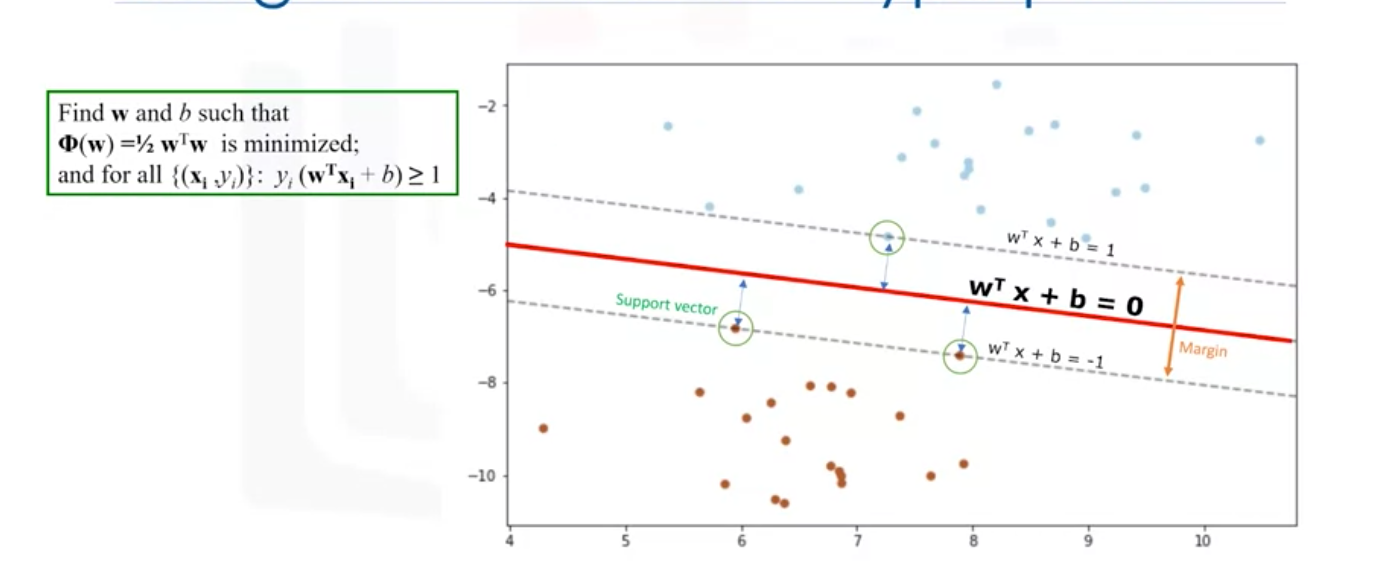

In [291]:
Image(filename = "/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/SVM.png")

#### Let's look at a specific cancer example again

In [292]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv

--2020-08-21 13:55:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  64.0KB/s    in 0.3s    

2020-08-21 13:55:33 (64.0 KB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [293]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


We can create a two dimensional plot which will illustrate the distribution of two distinct classes based on two-folded characteristics. Such are Clump and UnifSize. Of course, we could do this with more than two, but then we can no longer visualize it accordingly. Of course, you could also enlarge the Classes and plot more than two. 

In essence, what we want to do is to find a hyperplane that can non-linearily separate both types of cancer. 

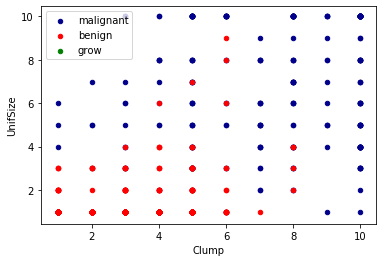

In [299]:
ax = cell_df[cell_df["Class"] == 4].plot(kind = "scatter", x = "Clump", y = "UnifSize", color = "DarkBlue", label ='malignant')
ax2 = cell_df[cell_df["Class"] == 2].plot(kind = "scatter", x = "Clump", y = "UnifSize", color = "Red", ax = ax, label='benign')
plt.show()

In [300]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [301]:
# Transforming the BareNuc into an integer: 

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

/Users/nikolas.anic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

As we cannot plot more than three characteristic distributions, we will solely compute the hyperplane or other form given by the non-linear separator of the SVM tool. We will use the nine distinct features below to define to which group the respective cancer belongs and then test it on a different data. 

In [302]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)

feature_y = cell_df["Class"].astype("int")

Y = np.asarray(feature_y)

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

#### Modelling: 

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

In [321]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train) 
Y_hat = clf.predict(X_test)

/Users/nikolas.anic/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [322]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [323]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, Y_hat, labels=[2,4]))

[[86  4]
 [ 0 47]]


Confusion matrix, without normalization
[[86  4]
 [ 0 47]]


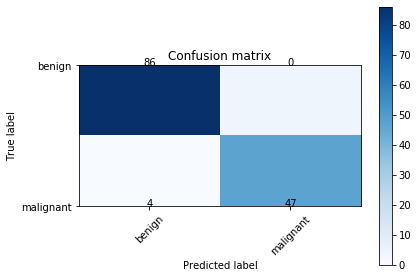

In [324]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_hat, labels=[2,4])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['benign','malignant'],normalize= False,  title='Confusion matrix')

In [325]:
print (classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In this chapter we looked at four distinct types of classification procedures:

1. K-Means
2. Decision Trees
3. Logistic Regression
4. SVM 

All four can help us selecting whether an individual is in a certain class or not. We can use different types of approaches for different cases (such as probability w/ logistic regression techniques). 

In order to assess their effectiveness, we looked at three types of evaluation metrics: 

1. Jaccard Index
2. F1
3. Log Loss (for Log regressions)

All three can explain the accuracy with which the training algorithm performed on the test dataset. However, until now, we can only use the F1 index based on binary data, but this is also possible for multilateral data. 

## 3. Clustering 

### A: K-Means clustering

A cluster is a group of data points or objects in a dataset that are similar to other objects in the group, and dissimilar to datapoints in other clusters. 

Classification algorithms predict categorical classed labels. This means assigning instances to predefined classes such as defaulted or not defaulted. 

It acts in a similar manner as classification techniques, but, instead of being a supervised learning technique where each training data instance belongs to a particular class, **the data is unlabeled and the process is unsupervised.** 
Clustering can be used for one of the following purposes: 

1. Exploratory data analysis
2. Summary generation or reducing the scale
3. Outlier detection- especially to be used for fraud detection or noise removal
4. Finding duplicates and datasets
5. As a pre-processing step for either prediction, other data mining tasks or as part of a complex system

We define several clustering approaches: 


1. Partitioned-based clustering
    - A group of clustering algorithms that produces fear like clusters, such as; 
    - K-Means, K-Medians or Fuzzy c-Means 
    - These algorithms are relatively efficient and are used for medium and large sized databases
2. Hierarchical clustering algorithms 
    - Produce trees of clusters
    - agglomerative and divisive algorithms
    - This group of algorithms are very intuitive and are generally good for use with small size datasets
3. 
    - Density-based clustering algorithms 
    - produce arbitrary shaped clusters 
    - They are especially good when dealing with spatial clusters or when there is noise in your data set